 #

# Ma422 Project - Fake bills dataset

Objective :
Predict if, according to several variables (left side height, right side height, lower margin, upper_margin etc.), a bill is genuine or not.

We import the librairies we need to read the datas and analyse it.

In [151]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We open and read the datas file.

In [152]:
df = pd.read_csv('src/datas/fake_bills.csv', header=0, delimiter=';')
#df_copy = df.copy()
print(df)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [153]:
df = df.drop_duplicates()
print(df)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

What do we observe ?
We can see that the shape of the dataset before and after dropping the duplicates observations is still the same. Then the dataset doesn't contain any duplicate observations.

Then, we check if there are NaN values. They must be removed in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

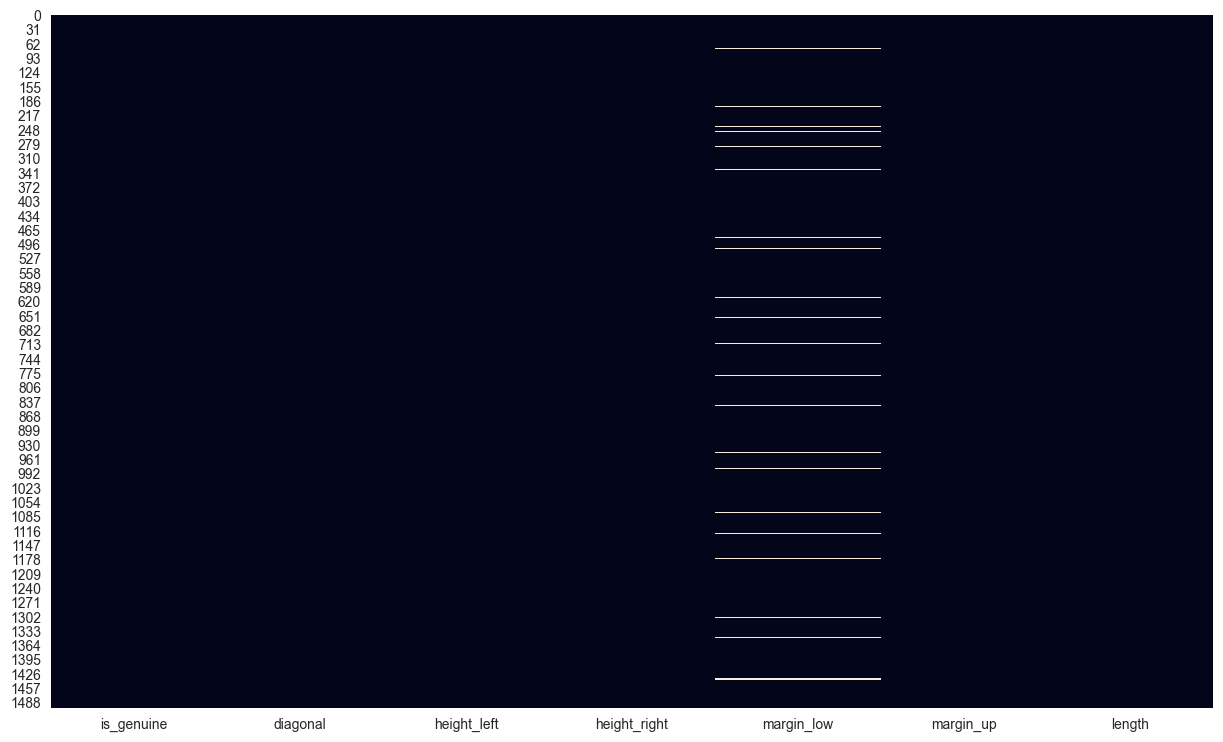

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_up       0.000000
length          0.000000
margin_low      0.024667
dtype: float64


In [154]:
def plotNanValues():
    plt.figure(figsize=(15, 9))
    sns.heatmap(df.isna(), cbar=False)
    plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

plotNanValues()
print(percentageOfNaNValues) # Normalized values between O and 1

Observations :
We have NaN values, only in one column which is 'margin_low'. In the whole dataset, we have no NaN values, except in the said column where there are 2.4667 % of NaN values (only for this variable).
<br>
We must remove these NaN values.
We will proceed by removing completely the observations containing at least 1 NaN value, as we have 1500 observations in total in our dataset.
To remove NaN values, we'll use the method `dropna` from `pandas`. This method automatically detects rows with NaN values and remove them.

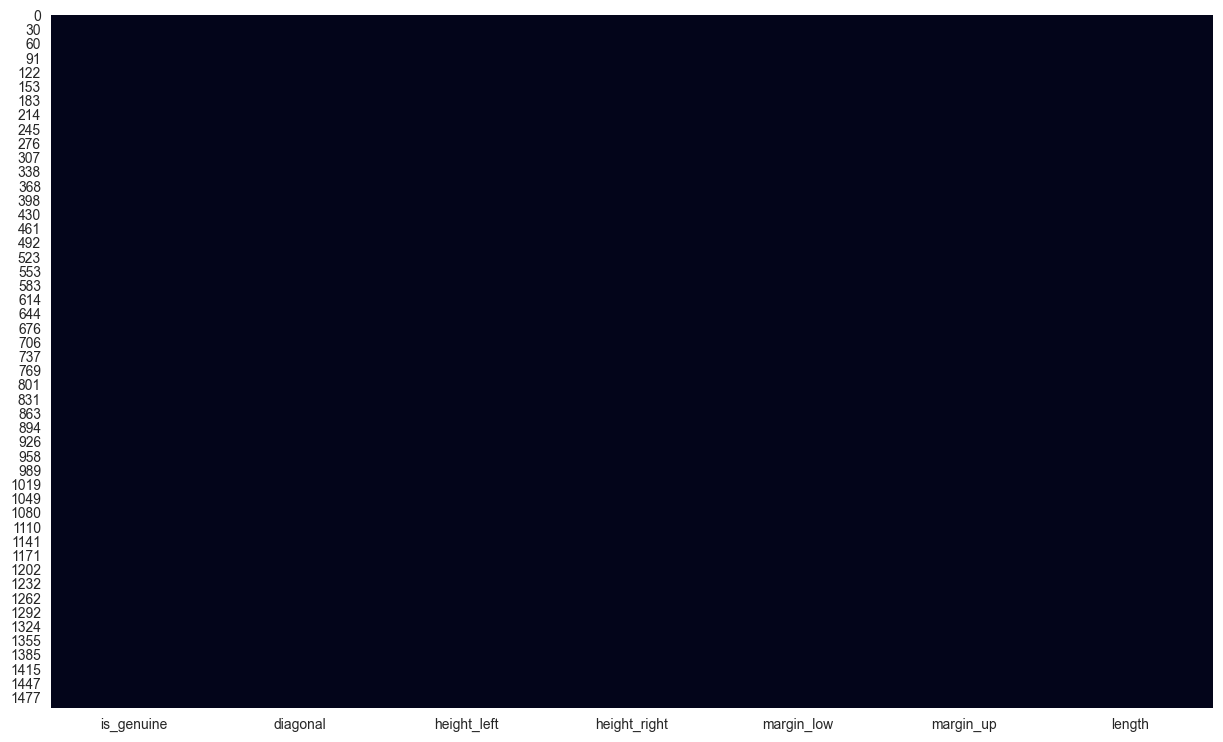

is_genuine      0.0
diagonal        0.0
height_left     0.0
height_right    0.0
margin_low      0.0
margin_up       0.0
length          0.0
dtype: float64


In [155]:
df = df.dropna()
percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)
plotNanValues()
print(percentageOfNaNValues)

B) Analyze the dataset
- What is the shape of the dataset ?
- What are the variables ? How many are they ?
- Are the variables interesting for the prediction ?
- What are their types ?
- What should be the target ?

In [156]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object') 

Dataset Shape : (1463, 7) 

Variables Types : is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object 

Variables Types Count : float64    6
bool       1
dtype: int64


Answers to the questions :
- What is the shape of the dataset ?
The dataset, after cleaning, contains 1463 rows (observations) and 7 columns (variables).
<br>

- What are the variables ? How many are they ?
The 7 variables are : is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length.
<br>

- What are their types ?
We have 6 variables that are floats and 1 variable which is a type boolean (is_genuine).
<br>

- Are the variables interesting for the prediction ?
6 variables are intersting for the prediction as they describe the measurement of a bill (diagonal, height_left, height_right, margin_low, margin_up, length). We can give these values to a model in order to the prediction and answer to our problematic.
<br>

- What should be the target ?
The target should be 'is_genuine'.

C) Analysis of the target variable

Here, we'll analyze quickly some aspects of the target variable. We can ask ourself two questions:

* What is type of the values in the target variable ? Is it a binary variable? an ordinal variable ? a categorical variable ? etc.
The target variable type is boolean, which means that its values could be binary (1 / 0)
<br>

* Does it need to be encoded ?
As this target variable, in the dataset is given as True or False, we have to encode them and change the True as 1 and False as 0 (One-Hot Encoding).

Repartition of the target :
 True     971
False    492
Name: is_genuine, dtype: int64

Type of this variable: bool


<Axes: ylabel='is_genuine'>

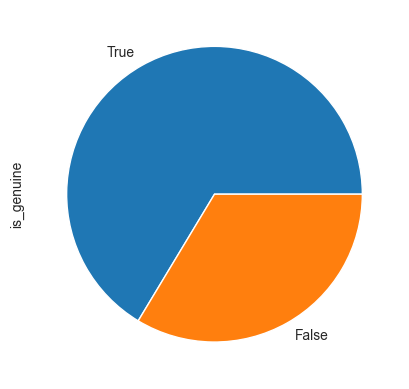

In [157]:
count_target = df['is_genuine'].value_counts()
target_type = df['is_genuine'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In this part, we'll prepare the datas to send them to the machine learning models.

We look at all the variables of our dataset and check if we have to encode some of them. Conlusion.

In [158]:
def oneHotEncoding():
    df['is_genuine'] = df['is_genuine'].replace({True: 1, False: 0})
    return df

df_encoded = oneHotEncoding()
print(df_encoded)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

We can finally build the matrices X and y.

In [159]:
X = df_encoded.drop('is_genuine', axis=1)
y = df_encoded['is_genuine']

print(X)
print(y)

      diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95        4.52       2.89  112.83
1       171.46       103.36        103.66        3.77       2.99  113.09
2       172.69       104.48        103.50        4.40       2.94  113.16
3       171.36       103.91        103.94        3.62       3.01  113.51
4       171.73       104.28        103.46        4.04       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1495    171.75       104.38        104.17        4.42       3.09  111.28
1496    172.19       104.63        104.44        5.27       3.37  110.97
1497    171.80       104.01        104.12        5.51       3.36  111.95
1498    172.06       104.28        104.06        5.17       3.46  112.25
1499    171.47       104.15        103.82        4.63       3.37  112.07

[1463 rows x 6 columns]
0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0

## 3 - Ensemble learning methods

#### A) Bagging method

We import the needed librairies for this section.

In [160]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

We have to split the data set into a training data set and a test dataset.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

Now, we can train and test our models.
We can try several methods and compare their performances.
Conclusion

Bagging method from scratch.

In [162]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=10):
    y_pred = np.zeros((X_test.shape[0], n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
# number of estimators is set to 100 by default

accuracyScratch_KNN = f1_score(y_test, y_pred_knn)
accuracyScratch_LR = f1_score(y_test, y_pred_lr)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)

Accuracy for Bagging from Scratch with KNN : 0.9965753424657535
Accuracy for Bagging from Scratch with LR : 0.9982847341337907


Bagging method using scikit-learn.

In [163]:
# KNN
# Defining different values of n_neighbors to try
n_neighbors = [1, 3, 5, 7, 9, 11]

# loop over different values of n_neighbors and evaluate the F1 score using cross-validation
best_f1 = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:  # The parameters with the best accuracy are stored into variables
        best_f1 = f1
        best_k = k

model1_KNN = KNeighborsClassifier(n_neighbors=best_k)
model1_KNN.fit(X_train, y_train)
y_pred = model1_KNN.predict(X_test)
accuracy1 = f1_score(y_test, y_pred)

print("Best value of k:", best_k)
print("F1 score with single KNN:", accuracy1)

###

# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model2_KNN = GridSearchCV(BaggingClassifier(), param_grid=param_grid, cv=10, scoring='f1')
model2_KNN.fit(X_train, y_train)
y_pred = model2_KNN.predict(X_test)
accuracy2 = f1_score(y_test, y_pred)

print("Best value of n_estimators:", model2_KNN.best_params_['n_estimators'])
print("F1 score for bagging with KNN:", accuracy2)

###

if (accuracy2 > accuracy1):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy2 < accuracy1):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy2 == accuracy1):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Best value of k: 1
F1 score with single KNN: 0.9965753424657535
Best value of n_estimators: 50
F1 score for bagging with KNN: 0.9965753424657535
The single method and the bagging method as same accuracies.
The difference of accuracies between the single method and the bagging is : 0.0


In [164]:
# Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model1_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10, scoring='f1')  # Performing Grid Search to find the best parameters for Logistic Regression
model1_LR.fit(X_train, y_train)
y_pred = model1_LR.predict(X_test)
accuracy1 = f1_score(y_test, y_pred)

print("Best parameters:", model1_LR.best_params_)
print("F1 score for Logistic Regression:", accuracy1)

###

# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model2_LR = GridSearchCV(BaggingClassifier(), param_grid=param_grid, cv=10, scoring='f1')  # Performing Grid Search to find the best parameters for the Bagging Classifier
model2_LR.fit(X_train, y_train)
y_pred = model2_LR.predict(X_test)
accuracy2 = f1_score(y_test, y_pred)

print("Best value of n_estimators for Logistic Regression:", model2_LR.best_params_['n_estimators'])
print("F1 score for bagging with Logistic Regression:", accuracy2)

###

if (accuracy2 > accuracy1):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy2 < accuracy1):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy2 == accuracy1):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
F1 score for Logistic Regression: 0.9982847341337907
Best value of n_estimators for Logistic Regression: 10
F1 score for bagging with Logistic Regression: 0.9982847341337907
The single method and the bagging method as same accuracies.
The difference of accuracies between the single method and the bagging is : 0.0


For our train and test, we used the K-Nearest Neighbors and the Logistic Regression as base estimator, as they are supervised learning methods.
We observe that, for the bagging method programmed from scratch, we have accuracy values which are very high. They are close to 1.
For the 'methods using scikit-learn' part, when we compare the results of the accuracy between the Bagging and the single methods, we have the exact same result.
It means that for our dataset, the Bagging method doesn't bring corrections and more accurate predictions. Then using the Bagging Method for this dataset is useless as the accuracy for the single models is excellent and the predictions as well.

In [169]:
# Prediction on a new observation
newBill_df = pd.DataFrame(data=[[12, 6, 6, 3, 2, 9]])

pred_BaggingKNN = model2_KNN.predict(newBill_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = False
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = True
print("Prediction 1 Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model2_LR.predict(newBill_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = False
elif pred_BaggingLR == 1:
    pred_BaggingLR = True
print("Prediction 1 Bagging LR:", pred_BaggingLR)


Prediction 1 Bagging KNN: False
Prediction 1 Bagging LR: False
